<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-1" data-toc-modified-id="Figure-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 1</a></span><ul class="toc-item"><li><span><a href="#Figure-1B" data-toc-modified-id="Figure-1B-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Figure 1B</a></span></li><li><span><a href="#Figure-1C" data-toc-modified-id="Figure-1C-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Figure 1C</a></span></li></ul></li><li><span><a href="#Figure-2" data-toc-modified-id="Figure-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 2</a></span><ul class="toc-item"><li><span><a href="#Figure-2A" data-toc-modified-id="Figure-2A-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Figure 2A</a></span></li><li><span><a href="#Figure-2B" data-toc-modified-id="Figure-2B-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Figure 2B</a></span></li><li><span><a href="#Figure-2C" data-toc-modified-id="Figure-2C-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Figure 2C</a></span></li><li><span><a href="#Figure-2D" data-toc-modified-id="Figure-2D-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Figure 2D</a></span></li></ul></li><li><span><a href="#Figure-3" data-toc-modified-id="Figure-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figure 3</a></span></li></ul></div>

In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2 
import numpy as np
from scipy.stats import mannwhitneyu

# Figure 1

In [3]:

with open('Fig1B_KDEF_Lesioned_models_dict_results.pickle', 'rb') as handle:
    dict_models_fig1B = pickle.load(handle)
    
with open('Fig1C_KDEF_SPLIT_Accuracy_Results.pickle', 'rb') as handle:
    dict_models_fig1C = pickle.load(handle)

## Figure 1B

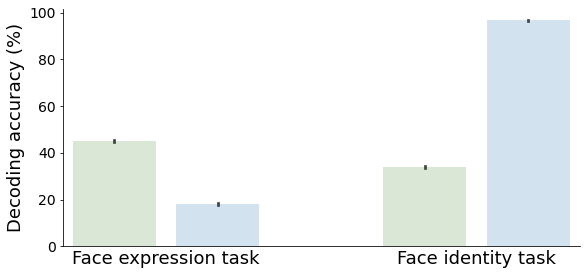

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from matplotlib.ticker import FuncFormatter

results_dataframe = pd.DataFrame({"Model":np.concatenate([([i]*100) for i in ["exp_model_exp_data",
                                                                          "id_model_exp_data",
                                                                          "",
                                                                          "exp_model_id_data",
                                                                          "id_model_id_data"]], axis=0),
                                                                          "avg_precision_score":0})

results_dataframe.loc[results_dataframe.Model == "exp_model_exp_data",
                  "avg_precision_score"] = dict_models_fig1B["precision_score_face_expression_model_face_expression_data"]

results_dataframe.loc[results_dataframe.Model == "exp_model_id_data",
                  "avg_precision_score"] = dict_models_fig1B["precision_score_face_expression_model_face_recognition_data"]

results_dataframe.loc[results_dataframe.Model == "id_model_exp_data",
                  "avg_precision_score"] = dict_models_fig1B["precision_score_face_recognition_model_face_expression_data"]

results_dataframe.loc[results_dataframe.Model == "id_model_id_data",
                  "avg_precision_score"] = dict_models_fig1B["precision_score_face_recognition_model_face_recognition_data"]


x = "Model"
y = "avg_precision_score"


plt.figure(figsize=(8,4))


ax = sns.barplot(data=results_dataframe, x=x, y=y,ci=95,palette=[np.divide([217,234,211],255),
                                                             np.divide([207,226,243],255),
                                                             np.divide([207,226,243],255),
                                                             np.divide([217,234,211],255),
                                                             np.divide([207,226,243],255)])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("precision score (across subjects and AUs)")
ax.tick_params(axis='x', which='major',length=0)

plt.tight_layout()
plt.yticks(fontsize=14)
plt.ylabel('Decoding accuracy (%)', fontsize=18, color='black')
plt.xlabel('')
plt.xticks([0.5,3.5], ['Face expression task', 'Face identity task'], fontsize=18)

plt.yticks(np.arange(0,1.1,0.2), np.arange(0,101,20), fontsize=14)    

plt.show()

## Figure 1C

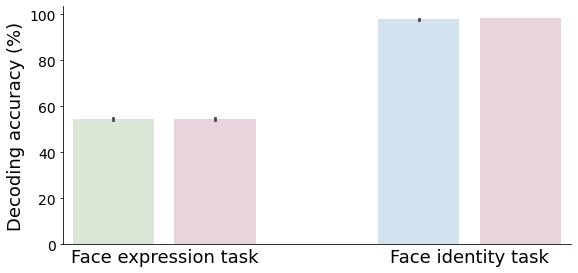

In [23]:
results_dataframe = pd.DataFrame({"Model":np.concatenate((["exp_model_exp_data"]*100,
                                                      ["dual_model_exp_data"]*100,
                                                      [""]*100,
                                                      ["id_model_id_data"]*100,
                                                      ["dual_model_id_data"]*100),
                                                      axis=0),
                                                      "avg_precision_score":0})

results_dataframe.loc[results_dataframe.Model == "exp_model_exp_data",
                  "avg_precision_score"] = [l*100 for l in dict_models_fig1C["avg_valid_prec_1_face_expression"]]

results_dataframe.loc[results_dataframe.Model == "dual_model_exp_data",
                  "avg_precision_score"] = [l*100 for l in dict_models_fig1C["avg_valid_prec_1_SPLIT_face_expression"]]

results_dataframe.loc[results_dataframe.Model == "id_model_id_data",
                  "avg_precision_score"] = [l*100 for l in dict_models_fig1C["avg_valid_prec_1_face_identity"]]

results_dataframe.loc[results_dataframe.Model == "dual_model_id_data",
                  "avg_precision_score"] = [l*100 for l in dict_models_fig1C["avg_valid_prec_1_SPLIT_face_identity"]]

results_dataframe["avg_precision_score"] = results_dataframe["avg_precision_score"].astype("float")

x = "Model"
y = "avg_precision_score"


plt.figure(figsize=(8,4))


ax = sns.barplot(data=results_dataframe, x=x, y=y,ci=95,palette=[np.divide([217,234,211],255),
                                                             np.divide([234,209,220],255),
                                                             np.divide([207,226,243],255),
                                                             np.divide([207,226,243],255),
                                                             np.divide([234,209,220],255)])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', which='major',length=0)


plt.tight_layout()
plt.yticks(fontsize=14)
plt.ylabel('Decoding accuracy (%)', fontsize=18, color='black')
plt.xlabel('')
plt.xticks([0.5,3.5], ['Face expression task', 'Face identity task'], fontsize=18)

plt.yticks(np.arange(0,110,20), np.arange(0,101,20), fontsize=14)    

plt.show()



# Figure 2

In [24]:
with open('Fig2A_dict.pickle', 'rb') as handle:
    dict_Fig2A = pickle.load(handle)
    
with open('Fig2B_dict.pickle', 'rb') as handle:
    dict_Fig2B = pickle.load(handle)
    
with open('Fig2C_dict.pickle', 'rb') as handle:
    dict_Fig2C = pickle.load(handle)
    
with open('Fig2D_dict.pickle', 'rb') as handle:
    dict_Fig2D = pickle.load(handle)
    

## Figure 2A

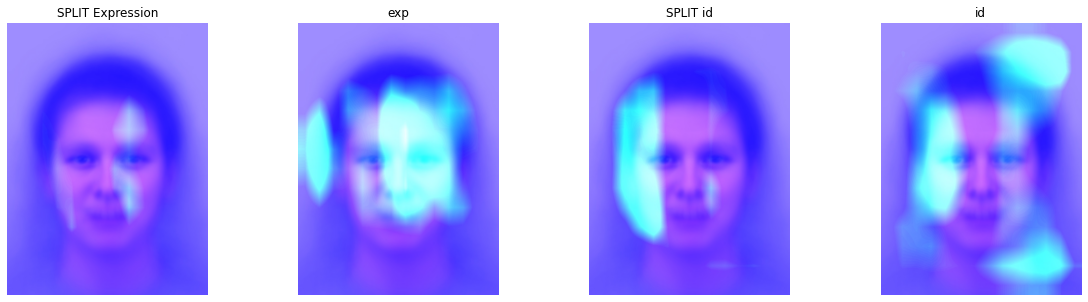

In [26]:
avg_img = dict_Fig2A["avg_img"]
plt.figure(figsize=(20,5))
for count,model_name in enumerate(["SPLIT Expression","exp","SPLIT id","id"]):
    plt.subplot(1,4,count+1)


    heatmap = dict_Fig2A[model_name]
    superimposed_img = avg_img + heatmap

    save_path = 'tmp.jpg'
    cv2.imwrite(save_path, superimposed_img)
    plt.imshow(plt.imread(save_path))
    plt.title(model_name if model_name!="SPLIT" else model_name+" id")
    plt.axis("off")

plt.show()

## Figure 2B

p-value for Heatmap SPLIT exp and exp: 0.0
p-value for Heatmap SPLIT exp and SPLIT id: 0.0
p-value for Heatmap SPLIT id and id: 0.0


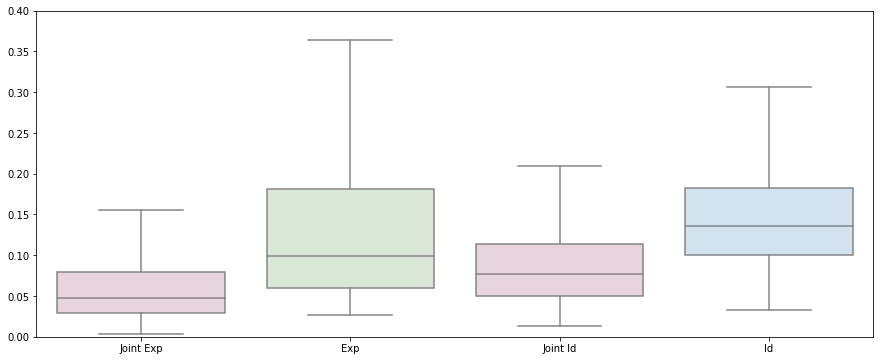

In [27]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

pixel_values1 = dict_Fig2B["SPLIT expression"]
pixel_values2 = dict_Fig2B["exp"]
pixel_values3 = dict_Fig2B["SPLIT id"]
pixel_values4 = dict_Fig2B["id"]

_, pvalue12 = mannwhitneyu(pixel_values1, pixel_values2)
_, pvalue13 = mannwhitneyu(pixel_values1, pixel_values3)
_, pvalue34 = mannwhitneyu(pixel_values3, pixel_values4)

# Print the pairwise p-values
print(f"p-value for Heatmap SPLIT exp and exp: {pvalue12}")
print(f"p-value for Heatmap SPLIT exp and SPLIT id: {pvalue13}")
print(f"p-value for Heatmap SPLIT id and id: {pvalue34}")

palette={"SPLIT":np.divide([234,209,220],255),
         "Exp":np.divide([217,234,211],255),
         "Id":np.divide([207,226,243],255)}


plt.figure(figsize=(15,6))
sns.boxplot(data=[pixel_values1,pixel_values2,pixel_values3,pixel_values4],showfliers=False,
           palette=[palette[l] for l in ["SPLIT","Exp","SPLIT","Id"]])
plt.ylim(0,0.4)
plt.xticks([0,1,2,3],["Joint Exp","Exp","Joint Id","Id"])
plt.show()

## Figure 2C

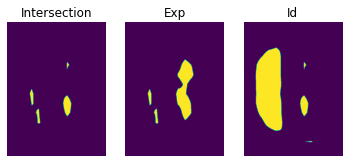

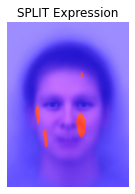

In [29]:
    
avg_img = dict_Fig2C["avg_img"]
heatmap_SPLIT_exp = dict_Fig2C["SPLIT expression"]
heatmap_SPLIT_id = dict_Fig2C["SPLIT id"]

min_95_percentile = min(np.percentile(heatmap_SPLIT_exp,95),np.percentile(heatmap_SPLIT_id,95))
img1_mask = (heatmap_SPLIT_exp>=min_95_percentile).astype(bool)
img2_mask = (heatmap_SPLIT_id>=min_95_percentile).astype(bool)

# perform element-wise bitwise AND between the masks
intersection_mask = np.bitwise_and(img1_mask, img2_mask)

# convert the intersection mask back to uint8 image
intersection_img = intersection_mask.astype(np.uint8) * 255

# intersection_img
plt.subplot(1,3,1)
plt.imshow(intersection_img)
plt.title("Intersection")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(img1_mask.astype(np.uint8) * 255)
plt.axis("off")
plt.title("Exp")
plt.subplot(1,3,3)
plt.imshow(img2_mask.astype(np.uint8) * 255)
plt.title("Id")
plt.axis("off")
plt.show()


plt.figure(figsize=(10,10))
heatmap = cv2.applyColorMap(intersection_img, cv2.COLORMAP_JET)
superimposed_img = avg_img + heatmap *1.5


save_path = 'tmp.jpg'
plt.subplot(1,4,1)

cv2.imwrite(save_path, superimposed_img)
plt.imshow(plt.imread(save_path))
plt.title("SPLIT Expression")
plt.axis("off")
plt.show()

## Figure 2D

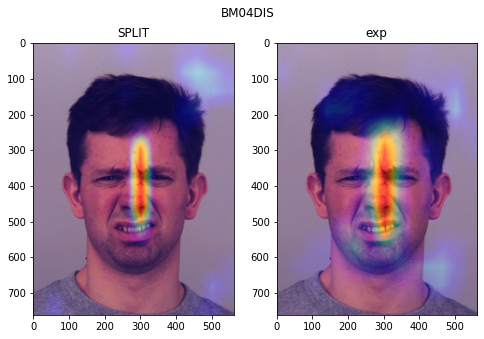

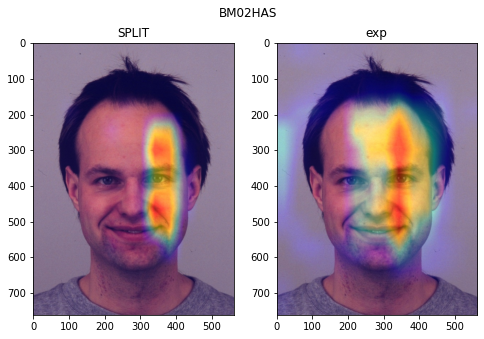

In [31]:

for img_name in dict_Fig2D.keys():

    plt.figure(figsize=(8,5))
    count = 1
    for model in ["SPLIT","exp"]:
    # Generate class activation heatmap
        heatmap = dict_Fig2D[img_name][model]["heatmap"]
        img = dict_Fig2D[img_name][model]["img"]

        # We resize the heatmap to have the same size as the original image
        heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

        # We convert the heatmap to RGB
        heatmap = np.uint8(255 * heatmap)

        # We apply the heatmap to the original image
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # 0.4 here is a heatmap intensity factor
        superimposed_img = heatmap * 0.4 + img


        # Save the image to disk
        save_path = 'tmp.jpg'
        plt.subplot(1,2,count)
        cv2.imwrite(save_path, superimposed_img)
        plt.imshow(plt.imread(save_path))
        plt.title(model)
        count+=1
    plt.suptitle(img_name)
    plt.show()

# Figure 3

In [42]:
pdf_path

'Fig3_and_S_Fig2_merged_SPLITConv2d.pdf'

In [43]:
from IPython.display import IFrame
pdf_path = "Fig3_and_S_Fig2_merged_SPLITConv2d.pdf"
IFrame(pdf_path, width=1600, height=1000)